In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns#시각화 라이브러리

In [2]:


#1. a문제정의
##생존자/사망자 예측
#kaggle 대회 높은 점수를 획득

##2. 데이터 수집
#kaggle 사이트 로부터 train, test 수집

In [3]:
train = pd.read_csv('./titanic/train.csv')


In [4]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [5]:
#            . 이위치에 .이 빠져있었어요 !
pd.read_csv('./titanic/train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#passengerId를 인덱스로 변경하기
#set_index
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')

In [7]:
pd.read_csv('./titanic/train.csv', index_col = 'PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [9]:
#결측치 확인
train.info()
#age, cabin embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [11]:
train.info()
#age, fare, cabin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
#train- embarked 결측치 채우기
#value_counts(): 각 컬럼에 몇 개의 값이 있는지 확인

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#최빈값(s)으로 결측치 채우기
#EMbarked 컬럼에 s 가 갖는 비율이 높음(70)
#2개의 결측치이기 때문에 학습에 큰 영향을 끼치지 않음
#fillna('결측치에 채울 값')- 결측치 채우기
train['Embarked']= train['Embarked'].fillna('S')
train['Embarked'].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
#train, test의  age 채우기
#다른컬럼 간의 상관관계를 통해서 결측치를 채워보자
#age와 다른 컬럼간의 상관관계를 알아보자
#corr: 상관관계 알아보기
# 절댓값이 1에 가까울 수록 두 컬럼간의 상관관계가 높다
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [15]:
# age- 객실등급(pclass), 성별(sex)
pt1 = train.pivot_table(values = 'Age',#궁금한 값
                 index = ['Pclass', 'Sex'],#기준값
                        #기준값에는 결측치가 존재하면 안된다
                 aggfunc = 'mean')#출력할 값
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [16]:
#인덱스 두개 입력

pt1.loc[3,'female'][0]

21.75

In [17]:
#apply : 행/ 열 단위로 작업을 할 때 사용
#np.isnan : 결측치면 : True,  결측치가 아니면 :  False
#loc
#astype: series타입변경

In [18]:
np.isnan(train['Age'])

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [19]:
train.iloc[0,:]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [20]:
def fill_age(data):
    #나이가 결측치인지 아닌지
    # 나이가 결측치라면 pt1값을 가져오고
    if np.isnan(data['Age']) : 
        return pt1.loc[data['Pclass'],data['Sex']][0]
    #나이가 결측치가 아니라면 그 값을 그대로 사용
    else : 
        return data['Age']

In [21]:
train['Age'] = train.apply(fill_age, axis = 1).astype('int')

In [22]:
#axis  =  1행 단위로 작업하겠다
# train에 있는 행을 하나씩 출력해서 fill_age 함수에 적용


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [25]:
test['Age'] = test.apply(fill_age, axis = 1).astype('int')

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


In [27]:
#test-fare결측치 채우기
#평균값
#fillna 활용
#1.결측치 제외하고 fare 값 출력하기
#train['Fare']

##train, test든 결측치를 채울때 기준을 train으로 해야함
#train - 훈련용: 규칙을 찾는다
#test - 평가용 : 찾은 규칙을 통해 예측
#평가>> 훈련에 대한 규칙을 통해서
#규칙 >> 훈련데이터로 정의

#test에 대한 결측치를 채울때
#규칙에 맞는 데이터를 집어 넣어야 하기 때문에  train 데이터를 통해서 결측치를 채운다
# test 데이터를 통해서 결측치를 채운다

#test데이터를 통해서 결측치를 채우게 되면 규칙에 어긋나는 데이터가 들어가게 되어서
#올바른 예측을 할 수 없게 됨


#2.출력한 값의 평균값 출력하기
#train['Fare'].mean()
#3.출력한 평균값으로 결측치 채우기
test.fillna(32)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,32,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,32,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,32,Q
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,32,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,32,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,32,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,32,S


In [28]:
#피벗테이블을 활용해서 fare 결측치 채우기
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [29]:
# test - fare결측치 채우기

In [30]:
#객실등급(Pclass), 성별(Sex)을 기준으로 사용

In [31]:
pt2 = train.pivot_table(values = 'Fare',#궁금한 값
                 index = ['Pclass', 'Sex'],#기준값
                        #기준값에는 결측치가 존재하면 안된다
                 aggfunc = 'mean')#출력할 값
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [32]:
def fill_Fare(data):
    #나이가 결측치인지 아닌지
    # 나이가 결측치라면 pt1값을 가져오고
    if np.isnan(data['Fare']) : 
        return pt2.loc[data['Pclass'],data['Sex']][0]
    #나이가 결측치가 아니라면 그 값을 그대로 사용
    else : 
        return data['Fare']

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


In [34]:
train['Fare'] = train.apply(fill_Fare, axis = 1)

In [35]:
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


In [36]:
#fare용 피벗테이블 생성
pt2 = train.pivot_table(values = 'Fare',
                  index = ['Pclass', 'Sex'],
                 aggfunc = 'mean')

pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [37]:
#fare에 있는 결측치행을 출력하기 위해서 불리언인덱싱
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [38]:
test['Fare']=test['Fare'].fillna(12.6)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


In [40]:
#train, test - Cabin  결측치 채우기
train['Cabin'].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
#cabin
#층별로 구분하기

In [42]:

#train['Cabin'] 컬럼에 각 값을 인덱싱
#인덱싱을 하기 위해서 값들이 문자열이 되어야함 > str
# 문자열의 0번 인덱스를 가져오겠다 >[0]
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]
#모든 값을 층별로 구분

In [43]:
train['Cabin'] = train['Cabin'].str[0]
train['Cabin']

PassengerId
1      NaN
2        C
3      NaN
4        C
5      NaN
      ... 
887    NaN
888      B
889    NaN
890      C
891    NaN
Name: Cabin, Length: 891, dtype: object

In [44]:

##결측치 자체를 하나의 데이터로 활용
#죽은사람에겐 정보를 수집할 수 없음
#cabin 컬럼의 결측치가 위의 이유일 것이다

#라는 가설을 세우고
#모든 결측치를 하나의 문자로 채움
train['Cabin']= train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')


In [45]:
train['Cabin']= train['Cabin'].fillna('M')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


<AxesSubplot:xlabel='Cabin', ylabel='count'>

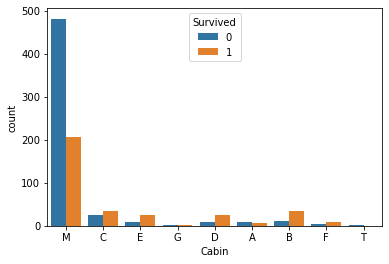

In [48]:
##탐색적 데이터 분석
#시각화를 통해서 컬럼을 분석
#cabin
sns.countplot(data = train, #사용할 데이터
              x = 'Cabin',#x축으로 사용할 컬럼
              hue = 'Survived' #count 에 대한 기준컬럼
             )

In [49]:
#M에서 상대적으로 많은 사람이 죽었다
# 위에서 세운 가설이 어느정도 성립
# 생존여부 판단에 활용해도 괜찮겠다


In [50]:
train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [51]:
test['Cabin'].unique()

array(['M', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [52]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,M,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,M,S


In [53]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,M,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,M,Q
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,M,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,M,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,M,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,M,S


In [54]:
train['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [55]:
test['Cabin'].value_counts()

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

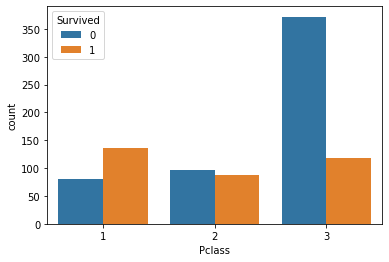

In [56]:
#Pclasee
sns.countplot(data = train, #사용할 데이터
              x = 'Pclass',#x축으로 사용할 컬럼
              hue = 'Survived' #count 에 대한 기준컬럼
             )

In [57]:
##-객실등급(Pclass)컬럼이 생존에 영향을 끼쳤다

##등급이 생존에 많은 차이를 보인다


<AxesSubplot:xlabel='Cabin', ylabel='count'>

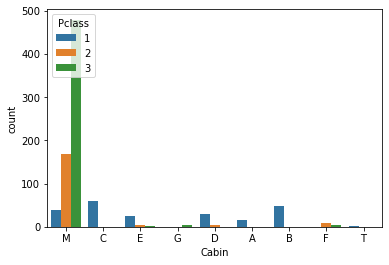

In [58]:
#####Pclass Cabin 컬럼 시각화
sns.countplot(data = train,
             x = 'Cabin',
             hue = 'Pclass')

In [59]:
#Cabin과 Pclass 간의 상관이 어느정도 있다ㅣ
#cabin의 M 값은 유의미한 결과를 도출

In [60]:
#Embarked
#탑승 위치별 생존

<AxesSubplot:xlabel='Embarked', ylabel='count'>

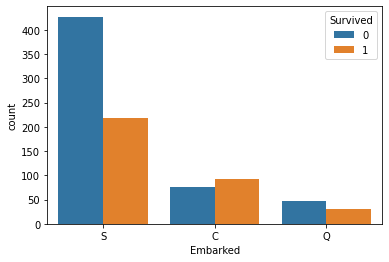

In [61]:
sns.countplot(data = train,
             x = 'Embarked',
             hue = 'Survived')

In [62]:
##s에서 탑승한 탑승객들은 많은 비율로 죽었다
#s(사우스 햄튼)의  경제력이 낮아서 낮은 등급의 객실을 타지 않았을까

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

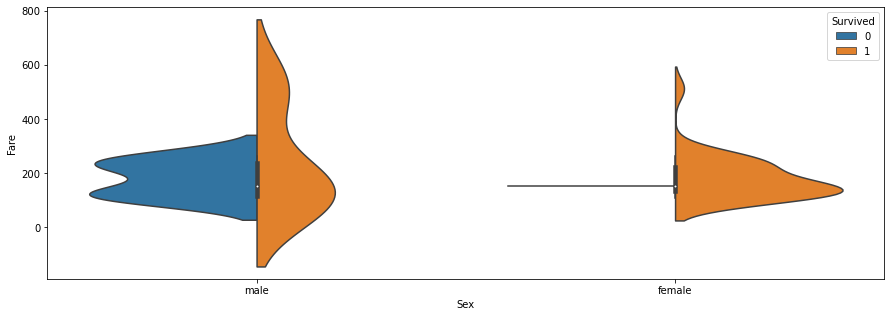

In [63]:
#AGE
#VIOLINPLOT
plt.figure(figsize = (15,5))
sns.violinplot(data =train[train['Fare']>=100],
              x='Sex',
              y = 'Fare',
              hue = 'Survived',
              split = True)

In [64]:
#20대 초반에 사람들이 가장많다
#어린아이 중에서는 남자아이가 산 비율이 높다
#남아선호사상같은 시대적 배경이 있지 않았을까?



In [65]:
#fare 시각화

In [66]:
#저렴한 객실에 승선한 사람들은 상대적으로 많이 죽었다

In [67]:
#parch, sibsp- 부모자식, 형제자매
# 가족
#family 새로운 특성을 생성
#같이 승선한 가족의 수
#family = parch+sibsp+1(본인)
#countplot
train['Family'] = train['Parch'] + train['SibSp'] + 1
test['Family'] = test['Parch'] +  test['SibSp'] + 1

<AxesSubplot:xlabel='Family', ylabel='count'>

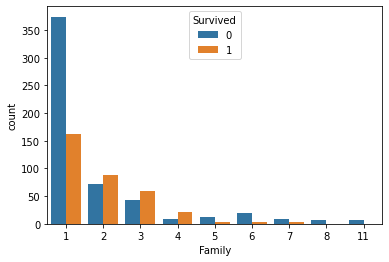

In [68]:
sns.countplot(data =train,
              x='Family',
              hue = 'Survived')
            

In [69]:
#Family를 범주형으로 만들자
#1:Alone
#2~4 : Small
#5이상이면 : Large
#pd.cut
bins = [0, 1, 4, 11]#범주형의 범위 지정
labels = ['Alone', 'Small', 'Large'] # 범주형에 달아줄 이름
#                                   위에 주석처리가 안되서 한글을 코드로 인식해서 오류가 났어요 !
train['Family'] = pd.cut(train['Family'], bins = bins, labels = labels)

In [70]:
test['Family'] = pd.cut(test['Family'], bins = bins, labels = labels)

In [71]:
train['Family'].value_counts()

Alone    537
Small    292
Large     62
Name: Family, dtype: int64

In [72]:
#글자열 데이터 다루기

In [73]:
#name
#중간 호칭만 추출
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [74]:
#apply
#split
temp = train['Name'].iloc[0]

In [75]:
temp.split(',')#쉼표를 기준으로 앞과 뒤로 데이터를 나눔

['Braund', ' Mr. Owen Harris']

In [76]:
temp.split(',')[1]#중간호칭은ㅇ 무조건 1번 인덱스에 위치

' Mr. Owen Harris'

In [77]:
temp.split(',')[1].split('.')#맞춤표를 기준으로 분리

[' Mr', ' Owen Harris']

In [78]:
temp.split(',')[1].split(',')[0].strip()#중간 호칭인  0번 인덱싱

'Mr. Owen Harris'

In [79]:
def split_name(data) :
    return data.split(',')[1].split('.')[0].strip()

In [80]:
#apply(axis = 1)
#axis = 1 : 행 단위로 작업
#axis = 0 : 열 단위로 작업(기본값)
train['Name'] =  train["Name"].apply(split_name)
test['Name'] = test["Name"].apply(split_name)

In [81]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [82]:
# #컬럼 지우기
# train = train.drop('지울 컬럼 이름', axis = 1)

In [83]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [84]:
Title_Dictionary = {
    "Capt": "Other",
    "Col": "Other",
    "Major": "Other",
    "Jonkheer": "Other",
    "Don": "Other",
    "Sir" : "Other",
    "Dr": "Dr",
    "Rev": "Rev",
    "the Countess":"Other",
    "Mme": "Other",
    "Mlle": "Other",
    "Ms": "Other",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Other"
}

In [85]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Ms                1
Jonkheer          1
the Countess      1
Sir               1
Capt              1
Don               1
Lady              1
Mme               1
Name: Name, dtype: int64

In [86]:
#map 함수를 활용해서 라벨 인코딩
train['Name'].map(Title_Dictionary).value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Name, dtype: int64

In [87]:
# map 함수를 활용해서 라벨인코딩
train['Name']=train['Name'].map(Title_Dictionary)
test['Name']=test['Name'].map(Title_Dictionary)

<AxesSubplot:xlabel='Name', ylabel='count'>

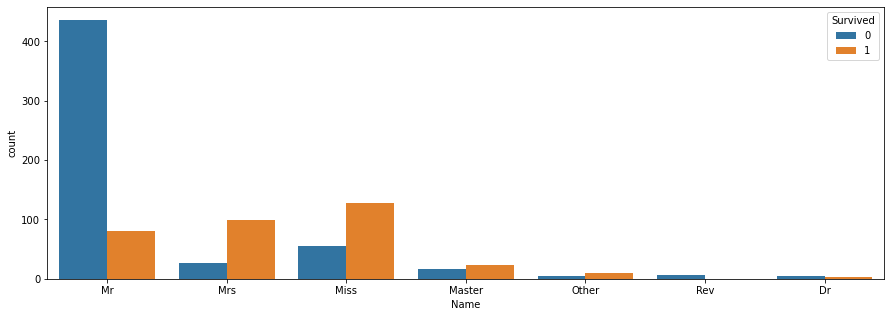

In [88]:
plt.figure(figsize = (15,5))
sns.countplot(data = train, x = 'Name', hue = 'Survived')

In [89]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [90]:
train['Ticket']

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object

In [91]:
#ticket 삭제
#유의미한 결과를 출력하기 힘들것이라고 판단해서
train.drop('Ticket', axis =1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [92]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [93]:
#one-hot 인코딩
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    int32   
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     891 non-null    object  
 9   Embarked  891 non-null    object  
 10  Family    891 non-null    category
dtypes: category(1), float64(1), int32(1), int64(4), object(4)
memory usage: 114.1+ KB


In [94]:
onehot_column=['Name', 'Sex', 'Cabin', 'Embarked', 'Family']

In [95]:
# #prefix : 원핫인코딩 후 어디서 파생된 컬럼인지 확인
# pd.get_dummies(train['Name'], prefix = "Name")

In [96]:
for col in onehot_column:
    #원핫인코딩한 컬럼 변수에 저장
    dummy = pd.get_dummies(train[col], prefix = col)
    
    #원핫인코딩된 결과물을 기존의 자료와 합치기
    train = pd.concat([train, dummy], axis = 1)
    
    #글자형컬럼(원핫인코딩 진행한) 삭제
    train.drop(col, axis = 1, inplace = True)

In [97]:
for col in onehot_column:
    #원핫인코딩한 컬럼 변수에 저장
    dummy = pd.get_dummies(test[col], prefix = col)
    
    #원핫인코딩된 결과물을 기존의 자료와 합치기
    test = pd.concat([test, dummy], axis = 1)
    
    #글자형컬럼(원핫인코딩 진행한) 삭제
    test.drop(col, axis = 1, inplace = True)

In [98]:
print(train.shape)
print(test.shape)

(891, 30)
(418, 28)


In [99]:
#train이 가지고 있는 컬럼 - test가 가지고 있는 컬럼
#train에는 있고 test에는 없는것
set(train.columns) - set(test.columns)



{'Cabin_T', 'Survived'}

In [100]:
#test가 가지고 있는 컬럼 -train이 가지고 있는 컬럼
#test에는 있고 train에는 없는것


set(test.columns) - set(train.columns)

set()

In [101]:
#기존 TEST에 CABIN 컬럼에 T라는 값이 없기 때문에
#원핫인코딩을 진행했을때 CABIN_T컬럼이 생성되지 않았다
#CABIN_T컬럼에는 모두 0의 값을 집어 넣어줌


test['Cabin_T'] = 0

In [102]:
print(train.shape)
print(test.shape)

(891, 30)
(418, 29)


In [103]:
#5.모델선택 및 하이퍼파리미터 튜닝


In [104]:
######훈련/평가 데이터를 -train, test

##문제와 정답으로 분리 - x,y
#x_train, y_train, x_test

X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test.copy()

In [105]:
X_train.shape, X_test.shape, y_train.shape

((891, 29), (418, 29), (891,))

In [106]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 4)

In [107]:
#교차검증
from sklearn.model_selection import cross_val_score

result = cross_val_score(tree, X_train, y_train, cv = 5)
result.mean()

0.8192831586215554

In [108]:
#6.학습

In [109]:
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [110]:
#7.평가

In [111]:
tree.score(X_train, y_train)

0.8439955106621774

In [112]:
#X_test를 통해서 예측값 출력하기
pre = tree.predict(X_test)

In [113]:
result = pd.read_csv('titanic/gender_submission.csv')

In [114]:
#result에 survived 컬럼을 예측한 값으로 채우자



result['Survived'] = pre

In [115]:
#result를 csv 파일로 저장
result.to_csv('DT_submission_01.csv', index = False)

In [116]:
##복원추출 - 데이터 중첩 허용
##중첩이 야기하는 효과- 다양한 알고리즘(중첩된 데이터에 집중한)이 나올 수 있다
## 결과적으로는 과대적합인데, 여러개의 dt모델을 연결해서
##평균, 투표를 통해서 결과를 집계하게 되면 과대 적합이 해소
##
##

In [117]:
#랜덤포레스트
#1.복원추출을 통해서 랜덤 데이터
#2. max feature를 통해서 랜덤한 특성
# 이 두가지를 통해서 다양한 알고리즘을 만듬


In [118]:
#랜덤트리 decision Tree
#복원추출> 데이터 랜덤성
#max_feature특성에 대한 랜덤성을 부여
#--decisionTree에서 다양한 알고리즘

In [119]:
#max_feature 개별트리에 적용
#선택할 데이터의 시드
#: random_state 복원 random_state 


In [120]:
#5-1
#랜덤포레스트

In [121]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,
                                #tree의 개수
                                      max_features=0.7,#각각의 트리에서 사용할 특성의 개수
                                      max_depth=5,
                                      min_samples_leaf=15,
                                      max_leaf_nodes=50)

In [122]:
## GridSearch
#여러개의 파라미터를 한번에 튜닝하는 방법
#교차 검증을 같이진행
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid={
    'max_depth' : [5,10,15,20],
    'n_estimators' :[1000,1500,2000,2500],
    'max_features' : [0.5, 0.7],
    'max_leaf_nodes' : [20,50,80],
    'max_leaf_nodes' : [10,15,20]
    
}

In [124]:
grid = GridSearchCV(forest, #gridSearch에 사용하 ㄹ모델
                   param_grid,#튜닝할 매개변수
                   cv = 3,#k겹 교차검증
                   verbose = 3 #현재 진행중인 학습열람
                   )
#gridsearch를 효율적으로 사용하자 
#randomforest 모델에 학습을 시작
#n_estimator의 최적의 값이 1000이고 이것을 찾아보려고 함
#1~2000까지 전부 돌려보고 최적의 값 찾기(가장 정확한 방법, 가장 비효율적)

#1, 500 , 1000, 1500, 2000
#위의 학습에선 1000 이 가장 좋은 것으로 나옴(501~1499 사이에 최적의 파라미터 존재)
#다음은 600 800 1000 1200 1400 조금더 세세하게 학습
#1000 이 가장 좋은 것으로 나옴(801~1199사이의 최적의 파라미터 존재)




In [125]:
#4*4*2*3*3=288번의 학습중에 제일 잘나온 것을 찾는 중
grid.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1000 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1000, score=0.805, total=   1.0s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1000, score=0.838, total=   1.0s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1000 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1000, score=0.815, total=   1.0s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1500 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1500, score=0.805, total=   1.5s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1500 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1500, score=0.842, total=   1.5s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1500 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=1500, score=0.815, total=   1.5s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=2000 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=2000, score=0.811, total=   2.0s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=2000 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=2000, score=0.838, total=   2.1s
[CV] max_depth=5, 

[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=1000, score=0.842, total=   1.1s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=1000 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=1000, score=0.811, total=   1.1s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=1500 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=1500, score=0.805, total=   1.6s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=1500 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=1500, score=0.842, total=   1.6s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=1500 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=1500, score=0.815, total=   1.6s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=2000 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=15, n_estimators=2000, score=0.805, total=   2.2s
[CV] max_depth=5, 

[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1000, score=0.818, total=   1.1s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1000 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1000, score=0.835, total=   1.1s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1000 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1000, score=0.818, total=   1.1s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1500 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1500, score=0.811, total=   1.6s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1500 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1500, score=0.842, total=   1.6s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1500 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, n_estimators=1500, score=0.815, total=   1.6s
[CV] ma

[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=20, n_estimators=2500, score=0.815, total=   2.8s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1000 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1000, score=0.815, total=   1.0s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1000 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1000, score=0.838, total=   1.0s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1000 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1000, score=0.815, total=   1.0s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1500 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1500, score=0.805, total=   1.5s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1500 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=10, n_estimators=1500, score=0.842, total=   1.5s
[CV] ma

[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=10, n_estimators=2500, score=0.842, total=   2.7s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=10, n_estimators=2500 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=10, n_estimators=2500, score=0.815, total=   2.7s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=15, n_estimators=1000 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=15, n_estimators=1000, score=0.805, total=   1.1s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=15, n_estimators=1000 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=15, n_estimators=1000, score=0.838, total=   1.1s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=15, n_estimators=1000 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=15, n_estimators=1000, score=0.815, total=   1.1s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=15, n_estimators=1500 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=15, n_estimators=1500, score=0.805, total=   1.7s
[CV] ma

[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=15, n_estimators=2500, score=0.818, total=   2.6s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=15, n_estimators=2500 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=15, n_estimators=2500, score=0.835, total=   2.6s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=15, n_estimators=2500 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=15, n_estimators=2500, score=0.815, total=   2.7s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=20, n_estimators=1000 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=20, n_estimators=1000, score=0.805, total=   1.0s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=20, n_estimators=1000 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=20, n_estimators=1000, score=0.842, total=   1.1s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=20, n_estimators=1000 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=20, n_estimators=1000, score=0.815, total=   1.1s
[CV] ma

[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=20, n_estimators=2000, score=0.815, total=   2.3s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=20, n_estimators=2500 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=20, n_estimators=2500, score=0.808, total=   2.7s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=20, n_estimators=2500 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=20, n_estimators=2500, score=0.842, total=   2.7s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=20, n_estimators=2500 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=20, n_estimators=2500, score=0.815, total=   2.8s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:  9.0min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_features=0.7,
                                              max_leaf_nodes=50,
                                              min_samples_leaf=15,
                                              n_estimators=1000),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.7],
                         'max_leaf_nodes': [10, 15, 20],
                         'n_estimators': [1000, 1500, 2000, 2500]},
             verbose=3)

In [126]:
#최적의 파라미터
print('최적의 파라미터:',grid.best_params_)
#최적의 예측점수
print('최고 예측 점수 : ',grid.best_score_)

최적의 파라미터: {'max_depth': 5, 'max_features': 0.5, 'max_leaf_nodes': 20, 'n_estimators': 2000}
최고 예측 점수 :  0.8249158249158249


In [127]:
#6-1
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.7, max_leaf_nodes=50,
                       min_samples_leaf=15, n_estimators=1000)

In [128]:
#7-1
pre = tree.predict(X_test)
result = pd.read_csv('titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('DT_submission_01.csv', index = False)

In [129]:
#5-2 knn 모델

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [131]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [132]:
#7-2

In [133]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [134]:
#5-3 voting

In [135]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
   estimators = [
       ('knn_model', knn),
       ('tree_model', tree),
       ('forest_model', forest)
       
       
   ],
    voting = 'soft'

)

In [136]:
#6-3


In [137]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('knn_model', KNeighborsClassifier()),
                             ('tree_model',
                              DecisionTreeClassifier(max_depth=4)),
                             ('forest_model',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=0.7,
                                                     max_leaf_nodes=50,
                                                     min_samples_leaf=15,
                                                     n_estimators=1000))],
                 voting='soft')

In [138]:
#7-3

In [139]:
pre = tree.predict(X_test)
result = pd.read_csv('titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('DT_submission_01.csv', index = False)

In [140]:
#6-4
#adaboost

In [141]:
from sklearn.ensemble import AdaBoostClassifier

In [142]:
adaboost = AdaBoostClassifier()

#### 6-4

In [143]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [144]:
#7-4

In [145]:
pre = tree.predict(X_test)
result = pd.read_csv('titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('DT_submission_01.csv', index = False)

In [146]:
#5-5 GRADIENTBOOSTING

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [148]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [149]:
pre=gbc.predict(X_test)
result = pd.read_csv('titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('DT_submission_01.csv', index = False)